In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch



In [126]:
def draw(value_type, interval_list, color_list):
    dot_list = list()
    for interval in interval_list:
        with open("result-interval-%ds/%s.csv" % (interval, value_type), "r") as f:
            lines = f.readlines()
        sched_list = list()
        for idx, line in enumerate(lines):
            line = line.split(",")
            dot_list.append([interval, float(line[1]), color_list[idx]])
            sched_list.append(line[0])
                            
    scatter_x = [dot[0] for dot in dot_list]
    scatter_y = [dot[1] for dot in dot_list]
    scatter_color = [dot[2] for dot in dot_list]   
    plt.cla()  
    plt.scatter(scatter_x, scatter_y, color=scatter_color, cmap='viridis')
    # 自定义图例项
    custom_legend = list()
    for idx, sched in enumerate(sched_list):
        custom_legend.append(Patch(facecolor=color_list[idx], label=sched))
    plt.legend(handles = custom_legend)
    plt.title(value_type)
    plt.xlabel("Interval/s")
    plt.savefig("result-%s.pdf" % value_type, bbox_inches='tight')

In [127]:
interval_list = [20,25,30,35,40,45,50,55,60,65]
value_list = ["jct", "jct-95th", "makespan"]
color_list = ["red", "blue", "green", "black", "purple", "orange", "black", "brown", "pink"]

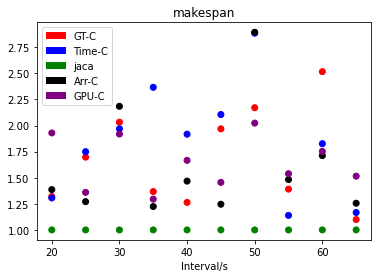

In [128]:
for type_value in value_list:
    draw(type_value, interval_list, color_list)